In [1]:
import yfinance as yf
start = "2010-01-01"
end = '2019-12-31'
df = yf.download('BTC-USD',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

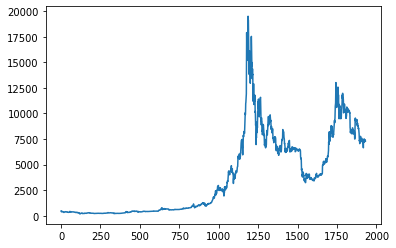

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1926    8198.521353
1927    8169.439756
1928    8139.955508
1929    8112.365620
1930    8085.098403
Name: Close, Length: 1931, dtype: float64

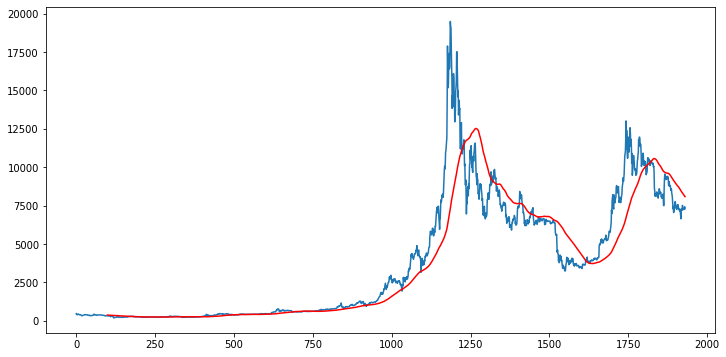

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1926    9331.485325
1927    9327.934119
1928    9324.885498
1929    9321.269475
1930    9316.579832
Name: Close, Length: 1931, dtype: float64

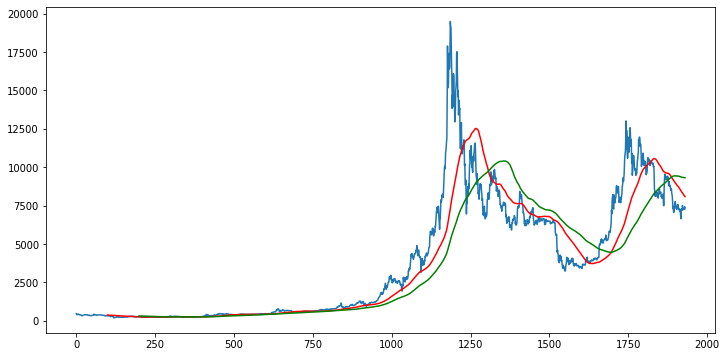

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(1931, 5)

In [16]:
#splitting of data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1351, 1)
(580, 1)


In [17]:
data_training.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [18]:
data_testing.head()

,Close
1351,7406.520020
1352,7494.169922
1353,7541.450195
1354,7643.450195
1355,7720.250000


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.37217281],
       [0.36015219],
       [0.37757516]])

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [32]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
40/40 [==============================] - 28s 376ms/step - loss: 0.0225
Epoch 2/50
40/40 [==============================] - 6s 161ms/step - loss: 0.0128
Epoch 3/50
40/40 [==============================] - 6s 159ms/step - loss: 0.0050
Epoch 4/50
40/40 [==============================] - 6s 157ms/step - loss: 0.0049
Epoch 5/50
40/40 [==============================] - 6s 158ms/step - loss: 0.0045
Epoch 6/50
40/40 [==============================] - 6s 155ms/step - loss: 0.0045
Epoch 7/50
40/40 [==============================] - 7s 164ms/step - loss: 0.0046
Epoch 8/50
40/40 [==============================] - 7s 166ms/step - loss: 0.0041
Epoch 9/50
40/40 [==============================] - 7s 178ms/step - loss: 0.0043
Epoch 10/50
40/40 [==============================] - 7s 173ms/step - loss: 0.0037
Epoch 11/50
40/40 [==============================] - 7s 175ms/step - loss: 0.0037
Epoch 12/50
40/40 [==============================] - 7s 175ms/step - loss: 0.0033
Epoch 13/50
40/40 [=====

In [33]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

,Close
1351,7406.520020
1352,7494.169922
1353,7541.450195
1354,7643.450195
1355,7720.250000


In [35]:
data_training.tail(100)

,Close
1251,11225.299805
1252,11403.700195
1253,10690.400391
1254,10005.000000
1255,10301.099609
...,...
1346,7480.140137
1347,7355.879883
1348,7368.220215
1349,7135.990234


In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\ybhav\AppData\Local\Temp\ipykernel_23656\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [38]:
final_df.head()

,Close
0,11225.299805
1,11403.700195
2,10690.400391
3,10005.000000
4,10301.099609


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[8.16868226e-01],
       [8.35110564e-01],
       [7.62172069e-01],
       [6.92086429e-01],
       [7.22364104e-01],
       [6.72460653e-01],
       [6.57292157e-01],
       [7.29072094e-01],
       [7.65771366e-01],
       [7.32262471e-01],
       [7.88819690e-01],
       [8.02665062e-01],
       [8.43904497e-01],
       [8.46246077e-01],
       [8.52452977e-01],
       [7.71323894e-01],
       [6.88054545e-01],
       [6.29711857e-01],
       [6.23836287e-01],
       [5.75617946e-01],
       [6.48487939e-01],
       [6.10294685e-01],
       [6.09244474e-01],
       [5.14654474e-01],
       [5.17829573e-01],
       [5.21663038e-01],
       [4.78565637e-01],
       [5.09937462e-01],
       [5.51552264e-01],
       [5.80471965e-01],
       [5.82088673e-01],
       [5.61554784e-01],
       [5.77010672e-01],
       [5.55383732e-01],
       [5.37761116e-01],
       [5.08477332e-01],
       [4.69992592e-01],
       [4.82410437e-01],
       [4.01753734e-01],
       [3.73615176e-01],


In [43]:
input_data.shape

(680, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(580, 100, 1)
(580,)


In [47]:
#Make Prediction

y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(580, 1)

In [49]:
y_test

array([4.26378773e-01, 4.35341416e-01, 4.40176062e-01, 4.50606076e-01,
       4.58459242e-01, 4.37417224e-01, 4.49615181e-01, 4.51682799e-01,
       4.54163532e-01, 4.48711262e-01, 4.39207685e-01, 3.62929525e-01,
       3.75292148e-01, 3.42104249e-01, 3.18334048e-01, 3.51612968e-01,
       3.29242633e-01, 3.38811667e-01, 3.33607894e-01, 3.57694047e-01,
       3.61285256e-01, 3.61961148e-01, 3.57174634e-01, 2.91112739e-01,
       2.99169418e-01, 3.00268659e-01, 3.08034949e-01, 2.92133243e-01,
       2.98622343e-01, 2.72681270e-01, 3.04877275e-01, 3.23866055e-01,
       3.22007041e-01, 3.45358036e-01, 3.36708249e-01, 3.43657497e-01,
       3.47910318e-01, 3.51423786e-01, 3.70180445e-01, 3.61688135e-01,
       3.58402693e-01, 3.16294090e-01, 3.22916102e-01, 3.05952002e-01,
       3.06896812e-01, 3.10789693e-01, 3.19330036e-01, 3.58402693e-01,
       4.17638015e-01, 4.22724154e-01, 4.32548826e-01, 4.21021618e-01,
       4.27684572e-01, 4.27602788e-01, 4.57524617e-01, 5.30448783e-01,
      

In [50]:
y_predicted

array([[0.42085055],
       [0.41286176],
       [0.4061181 ],
       [0.40095922],
       [0.39770764],
       [0.39671606],
       [0.3976879 ],
       [0.40037185],
       [0.40450436],
       [0.40983224],
       [0.4159727 ],
       [0.4222331 ],
       [0.42654747],
       [0.42791444],
       [0.42580402],
       [0.42006856],
       [0.41169065],
       [0.40162355],
       [0.39094782],
       [0.38057482],
       [0.37149292],
       [0.36444825],
       [0.3598037 ],
       [0.35756922],
       [0.35663524],
       [0.35610765],
       [0.35547626],
       [0.35464084],
       [0.3534996 ],
       [0.35213238],
       [0.350401  ],
       [0.34860098],
       [0.34726834],
       [0.34678048],
       [0.34757888],
       [0.3497819 ],
       [0.35335082],
       [0.35812122],
       [0.36384082],
       [0.37046087],
       [0.37774253],
       [0.38526374],
       [0.39184785],
       [0.39674923],
       [0.39945516],
       [0.39990044],
       [0.39840406],
       [0.395

In [51]:
scaler.scale_

array([0.00010226])

In [52]:
scale_factor = 1/0.00010226
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

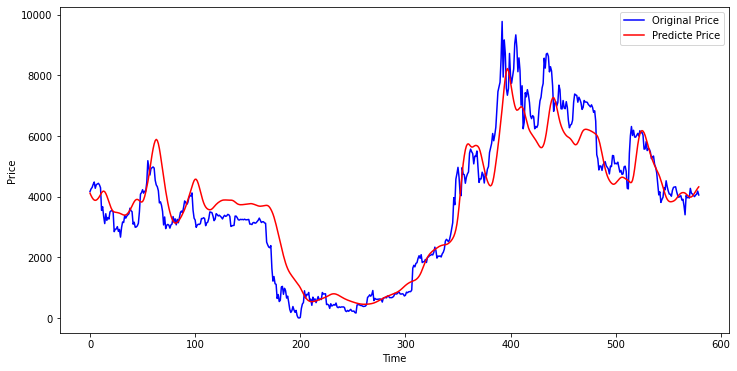

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicte Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()